In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
train_data=pd.read_csv(('train.txt'), sep=' ', header = None, dtype='Int64').to_numpy()
test_data=pd.read_csv(('test.txt'), sep=' ', header = None, dtype='Int64').to_numpy()

In [31]:
c1_train=[]
c2_train=[]
for i in train_data:
    if(i[2]==1):
        c1_train.append([i[0],i[1]])
    else:
         c2_train.append([i[0],i[1]])
c1_train=np.array(c1_train)
c2_train=np.array(c2_train)
minx= (np.minimum(c1_train[:,0],c2_train[:,0])).min()
maxx= (np.maximum(c1_train[:,0],c2_train[:,0])).max()


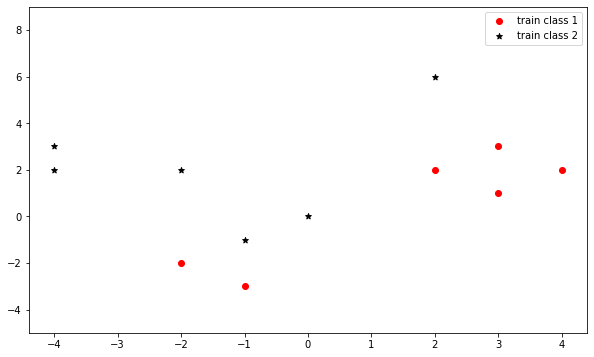

In [32]:
fig,ax = plt.subplots(figsize=(10,6))
plt.scatter(c1_train[:,0], c1_train[:,1], c = 'r', marker='o', label = 'train class 1')
plt.scatter(c2_train[:,0], c2_train[:,1], c = '0', marker='*', label = 'train class 2')
plt.legend(loc = 'best')
ax.set_ylim(-8,18)
ax.set_ylim(-5,9)
plt.show()


In [33]:
y1=np.mat([c1_train[:,0].mean(), c1_train[:,1].mean()])
y2=np.mat([c2_train[:,0].mean(), c2_train[:,1].mean()])

In [34]:
x_test=[]
y_test=[]
for i in test_data:
    x_test.append([i[0],i[1]])
    y_test.append(i[2])
x_test_matrix = np.asmatrix(x_test)

    

In [35]:
c1_test=[]
c2_test=[]
accuracy=[]

for i in range(len(x_test)):
    g1=(y1*x_test_matrix[i].transpose())-(0.5 * (y1*y1.transpose()))
    g2=(y2*x_test_matrix[i].transpose())-(0.5 * (y2*y2.transpose()))
    
    if g1 > g2:
        c1_test.append([x_test_matrix[i].item(0), x_test_matrix[i].item(1)])
        accuracy.append(1)
    else:
        c2_test.append([x_test_matrix[i].item(0), x_test_matrix[i].item(1)])
        accuracy.append(2)
c1_test = np.array(c1_test)
c2_test = np.array(c2_test)

In [36]:
x_bound=[]
y_bound=[]
Y=y1-y2
cont=0.5 * ((y1*y1.transpose()) - (y2*y2.transpose()))
for i in range(-4, 9):
    x_bound.append(i)
    j=(cont.item(0) - Y.item(0)*i)/Y.item(1)
    y_bound.append(j)

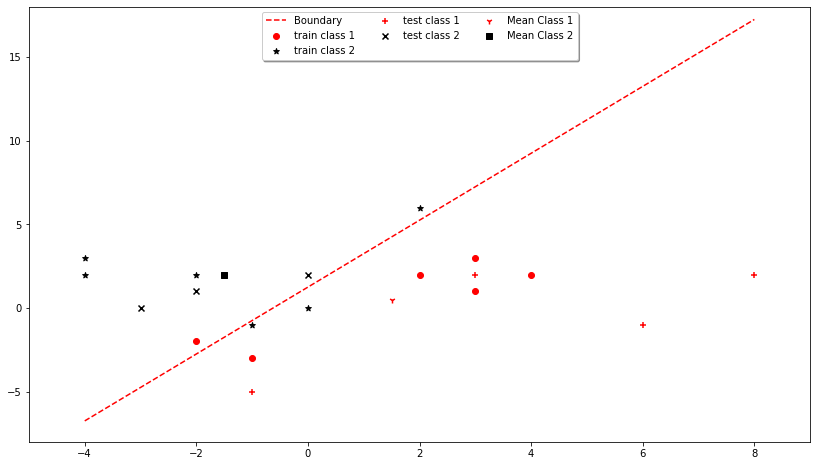

In [39]:
fig,ax = plt.subplots(figsize=(14,8))
plt.scatter(c1_train[:,0], c1_train[:,1], c = 'r', marker='o', label = 'train class 1')
plt.scatter(c2_train[:,0], c2_train[:,1], c = '0', marker='*', label = 'train class 2')

plt.scatter(c1_test[:,0], c1_test[:,1], c = 'r', marker='+', label = 'test class 1')
plt.scatter(c2_test[:,0], c2_test[:,1], c = '0', marker='x', label = 'test class 2')

plt.scatter(y1.item(0),y1.item(1),c='r',marker='1',label='Mean Class 1')
plt.scatter(y2.item(0),y2.item(1),c='0',marker='s',label='Mean Class 2')

plt.plot(x_bound, y_bound,'--',c='red', label='Boundary')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),ncol=3, fancybox=True, shadow=True)
ax.set_ylim(-8,18)
ax.set_xlim(-5,9)

plt.show()

In [25]:
TP=0
TN=0
for i in range(len(y_test)):
    if(y_test[i]==accuracy[i] & accuracy[i]==1):
        TP = TP+1
    elif(y_test[i]==accuracy[i] & accuracy[i]==2):
        TN = TN+1
acc = ((TP+TN)/len(y_test))*100
print("Accuracy =", acc)

Accuracy = 85.71428571428571
